In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pandas as pd
import pickle

def strMas(Suitcard, Rankcard, PokerHand, data):
      
    mas = np.zeros((data.shape[0], data.shape[1]), dtype = 'object')
    i = 0
    while i < mas.shape[0]:
        j = 0
        while j < mas.shape[1]:
            if j==(mas.shape[1]-1):  mas[i,j] = PokerHand[data[i,j]]
            elif (j%2)==0: mas[i,j] = Suitcard[data[i,j]]
            else: mas[i,j] = Rankcard[data[i,j]]
            j+=1    
        i+=1
        
    return mas

In [2]:

# Создадим словари
Suitcard = dict([(1, 'черва'), (2, 'пика'), (3, 'бубна'), (4, 'трефа')])
Rankcard = dict([(1, 'туз'), (2, 'двойка'), (3, 'тройка'), (4, 'четверка'),
                (5, 'пятерка'), (6, 'шестерка'), (7, 'семерка'),
                (8, 'восьмерка'), (9, 'девятка'),(10, 'десятка'),
                (11, 'валет'), (12, 'дама'),(13, 'король')])
PokerHand = dict([(0, 'Ничего в руке; не признанная покерная комбинация'), (1, 'одна пара; одна пара равных рангов в пределах пяти карт'),  (2, 'две пары; две пары одинаковых рангов в пределах пяти карт'), 
                  (3, 'Тройка; три равных ранга в пяти картах'), (4, 'Straight; пять карт, расположенных последовательно без пропусков'), (5, 'Флеш; пять карт одной масти'), (6, 'Фулл-хаус; пара + тройка разного ранга'),
                  (7, 'Каре; четыре равных ранга на пяти картах'), (8, 'Стрит-флеш'), (9, 'флеш-рояль')])


In [3]:
columns = ['S1','C1','S2','C2','S3','C3','S4', 'C4','S5', 'C5','Покерная рука-комбинация карт']
dataTraining = np.genfromtxt('poker-hand-training-true.data', dtype=None, delimiter=",", max_rows=400)
dataTest = np.genfromtxt('poker-hand-testing.data', dtype=None, delimiter=",", max_rows=300)
datasetTraining = pd.DataFrame(strMas(Suitcard,Rankcard,PokerHand, dataTraining), columns=columns)
print('S№ - масть карты; \nC№ - ранг карты, где № - номер карты в руке. \nОбучающие данные')
datasetTraining

S№ - масть карты; 
C№ - ранг карты, где № - номер карты в руке. 
Обучающие данные


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Покерная рука-комбинация карт
0,черва,десятка,черва,валет,черва,король,черва,дама,черва,туз,флеш-рояль
1,пика,валет,пика,король,пика,десятка,пика,дама,пика,туз,флеш-рояль
2,бубна,дама,бубна,валет,бубна,король,бубна,десятка,бубна,туз,флеш-рояль
3,трефа,десятка,трефа,валет,трефа,туз,трефа,король,трефа,дама,флеш-рояль
4,трефа,туз,трефа,король,трефа,дама,трефа,валет,трефа,десятка,флеш-рояль
...,...,...,...,...,...,...,...,...,...,...,...
395,трефа,туз,пика,шестерка,бубна,восьмерка,бубна,двойка,черва,шестерка,одна пара; одна пара равных рангов в пределах ...
396,трефа,пятерка,черва,восьмерка,пика,дама,черва,дама,черва,король,одна пара; одна пара равных рангов в пределах ...
397,трефа,валет,пика,двойка,трефа,десятка,бубна,дама,черва,семерка,Ничего в руке; не признанная покерная комбинация
398,трефа,четверка,черва,семерка,бубна,король,бубна,дама,пика,двойка,Ничего в руке; не признанная покерная комбинация


In [4]:
datasetTest = pd.DataFrame(strMas(Suitcard,Rankcard,PokerHand, dataTest), columns=columns)
print('S№ - масть карты; \nC№ - ранг карты, где № - номер карты в руке. \nОбучающие данные')
datasetTest

S№ - масть карты; 
C№ - ранг карты, где № - номер карты в руке. 
Обучающие данные


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Покерная рука-комбинация карт
0,черва,туз,черва,король,пика,четверка,пика,тройка,черва,дама,Ничего в руке; не признанная покерная комбинация
1,бубна,дама,бубна,двойка,бубна,валет,трефа,пятерка,пика,пятерка,одна пара; одна пара равных рангов в пределах ...
2,черва,девятка,трефа,шестерка,черва,четверка,бубна,двойка,бубна,девятка,одна пара; одна пара равных рангов в пределах ...
3,черва,четверка,бубна,король,пика,король,пика,туз,бубна,шестерка,одна пара; одна пара равных рангов в пределах ...
4,бубна,десятка,пика,семерка,черва,двойка,пика,валет,трефа,девятка,Ничего в руке; не признанная покерная комбинация
...,...,...,...,...,...,...,...,...,...,...,...
295,пика,двойка,трефа,семерка,трефа,пятерка,пика,король,бубна,восьмерка,Ничего в руке; не признанная покерная комбинация
296,черва,тройка,пика,шестерка,бубна,валет,пика,четверка,пика,король,Ничего в руке; не признанная покерная комбинация
297,трефа,дама,трефа,валет,трефа,король,трефа,семерка,бубна,четверка,Ничего в руке; не признанная покерная комбинация
298,трефа,двойка,бубна,пятерка,трефа,король,бубна,восьмерка,пика,туз,Ничего в руке; не признанная покерная комбинация


 
 Точность классификации итоговой модели на обучающей и тестовой выборках 
 
точность тренировочной выборки:   0.9775
ошибка классификации тренировочной выборки:   0.022499999999999964
точность тестовой выборки:  0.46
 
Таблица экспериментов подбора гиперпараметров 
 
|    |   № |   max_depth |   min_samples_split |   min_samples_leaf |   train accuracy |   test accuracy |
|---:|----:|------------:|--------------------:|-------------------:|-----------------:|----------------:|
|  0 |   0 |          10 |               0.01  |              0.1   |           0.5625 |        0.496667 |
|  1 |   1 |          10 |               0.01  |              0.007 |           0.8225 |        0.466667 |
|  2 |   2 |          10 |               0.01  |              0.01  |           0.7775 |        0.466667 |
|  3 |   3 |          10 |               0.01  |              0.002 |           0.9    |        0.433333 |
|  4 |   4 |          10 |               0.007 |              0.1   |           0.5625 |

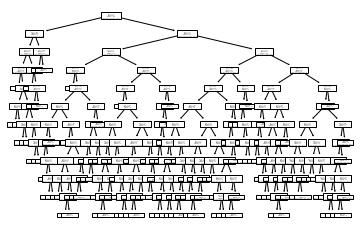

In [7]:
treeTraining = DecisionTreeClassifier(max_depth=11, min_samples_split = 0.001, min_samples_leaf=0.002); # создаем экземпляр классификатора
# treeTraining = DecisionTreeClassifier();
X_train = np.array(dataTraining[:, 0:dataTraining.shape[1]-1])
Y_train = np.array(dataTraining[:, dataTraining.shape[1]-1])
X_test = np.array(dataTest[:, 0:dataTest.shape[1]-1])
Y_test = np.array(dataTest[:, dataTest.shape[1]-1])
treeTraining.fit(X_train, Y_train) # обучение классификатора

pickle.dump(treeTraining, open('model', 'wb'))
loaded_model = pickle.load(open('model', 'rb'))
tree.plot_tree(loaded_model) # вывод дерева

print(" \n Точность классификации итоговой модели на обучающей и тестовой выборках \n ")
print('точность тренировочной выборки:  ',  treeTraining.score(X_train, Y_train))
print('ошибка классификации тренировочной выборки:  ',  (1-treeTraining.score(X_train, Y_train)))
print('точность тестовой выборки: ',  treeTraining.score(X_test, Y_test))

MasMinSamplesSplit=[0.01, 0.007, 0.004, 0.001]
MasMinSamplesleaf=[0.1, 0.007, 0.01, 0.002]

ii=0
result = pd.DataFrame([], columns=["№", "max_depth", "min_samples_split", "min_samples_leaf", "train accuracy", "test accuracy" ])
for i in range(10,15):
    for j in MasMinSamplesSplit:
        for k in MasMinSamplesleaf:
            treeTraining = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            treeTraining.fit(X_train, Y_train)
            result.loc[ii]=[ii, i, j, k, treeTraining.score(X_train, Y_train),treeTraining.score(X_test, Y_test)]
            ii+=1;

                    
print(" \nТаблица экспериментов подбора гиперпараметров \n ")
print(result.to_markdown())